=== 5 Dòng Đầu Tiên của Dataset ===
   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

  

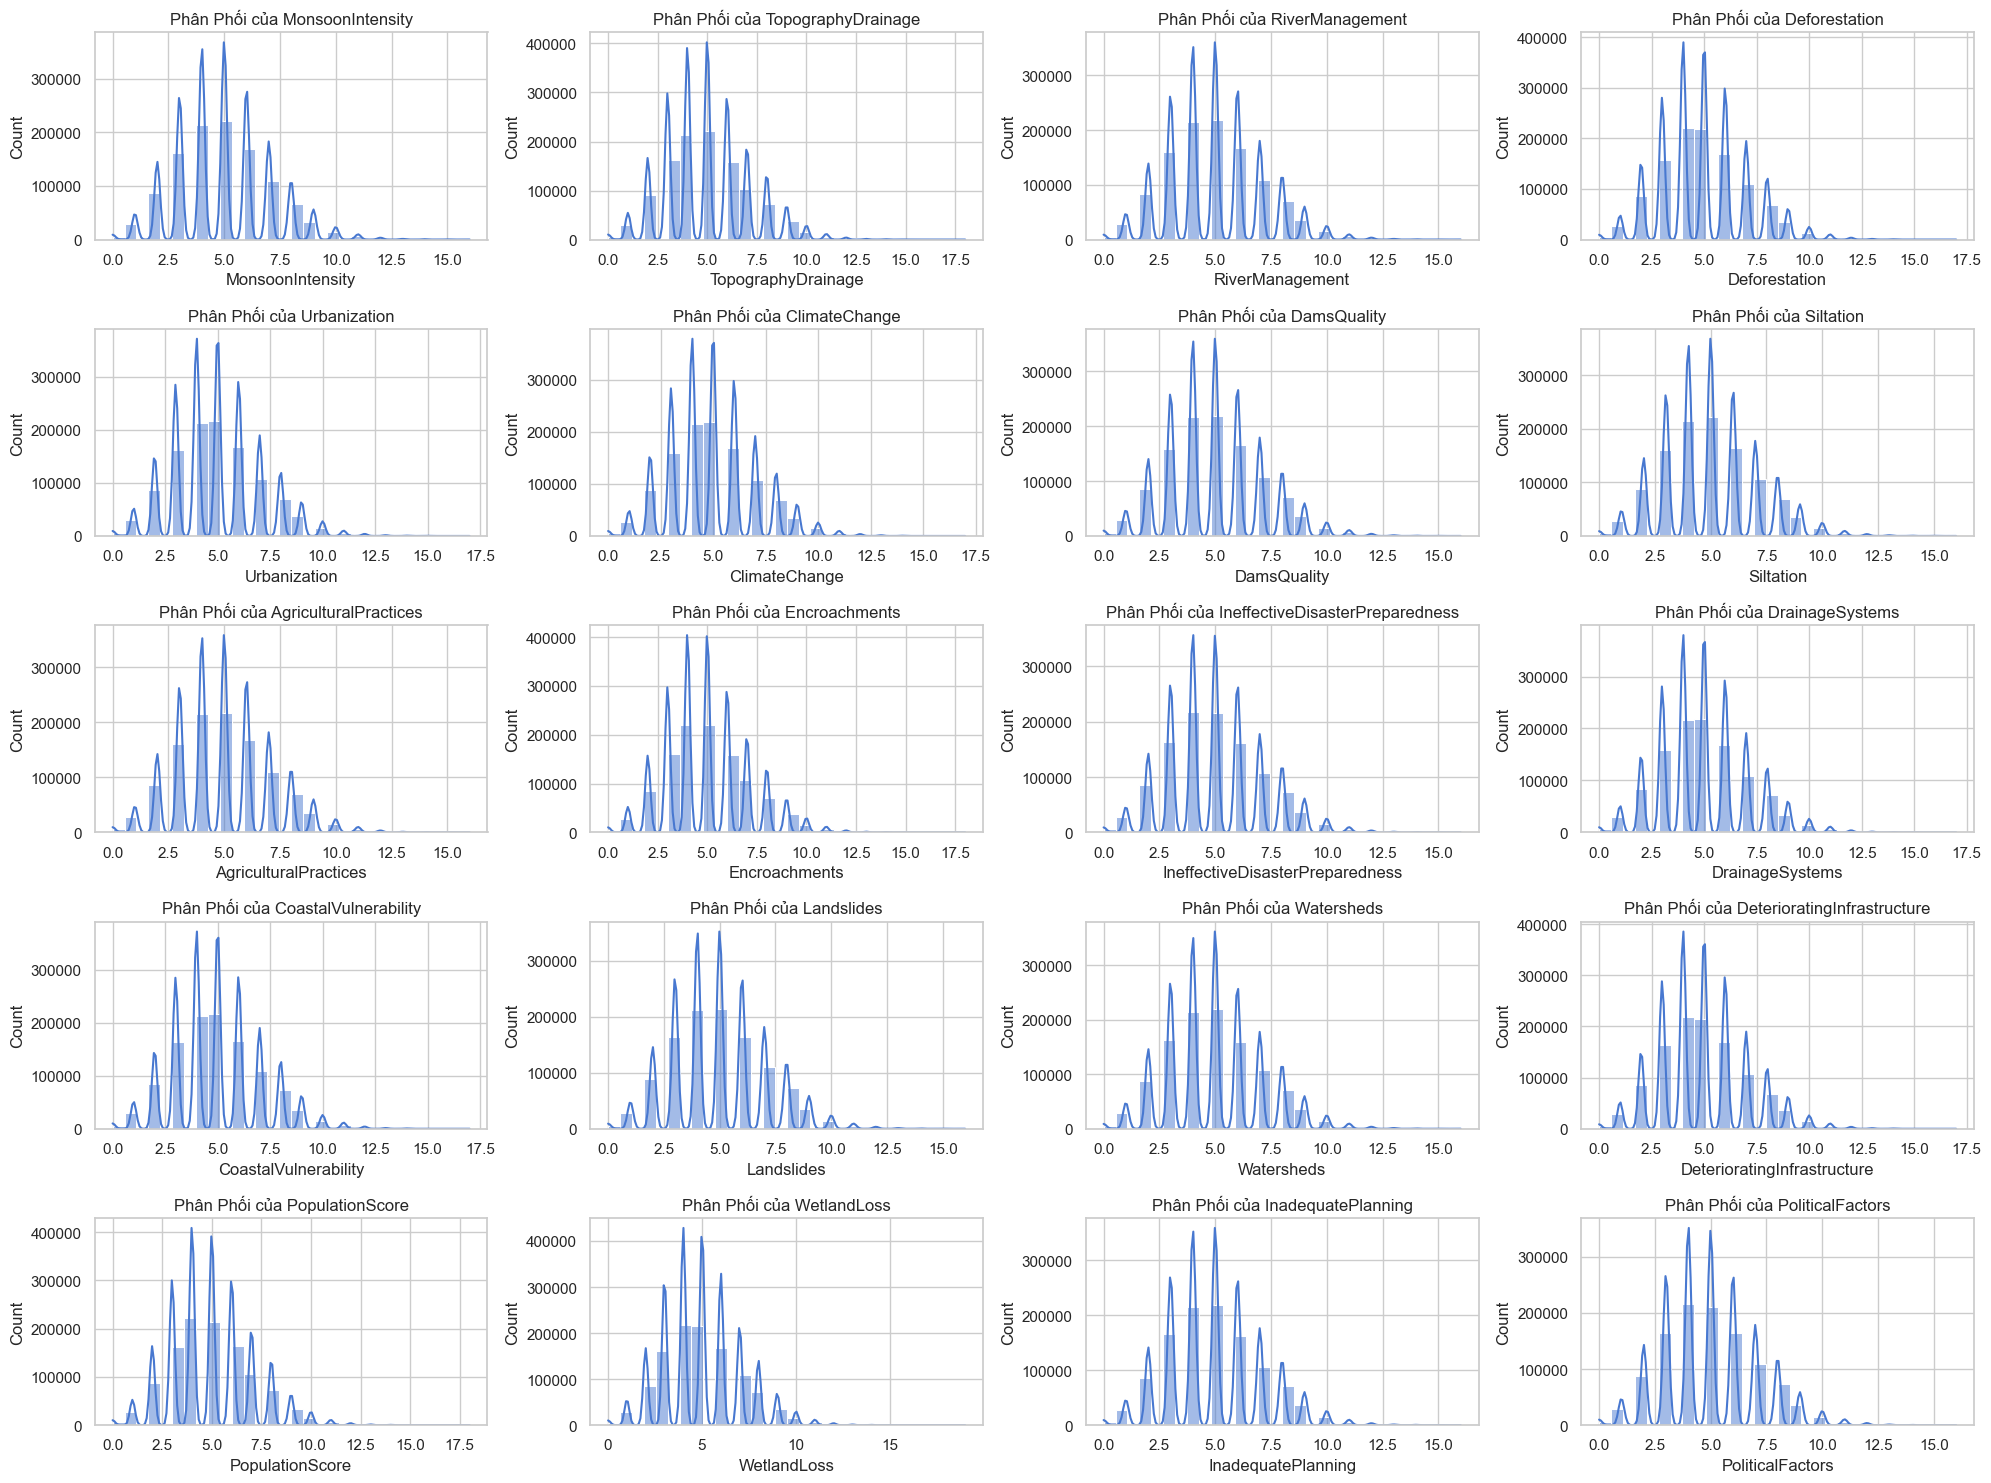


=== Boxplot của Các Đặc Trưng ===


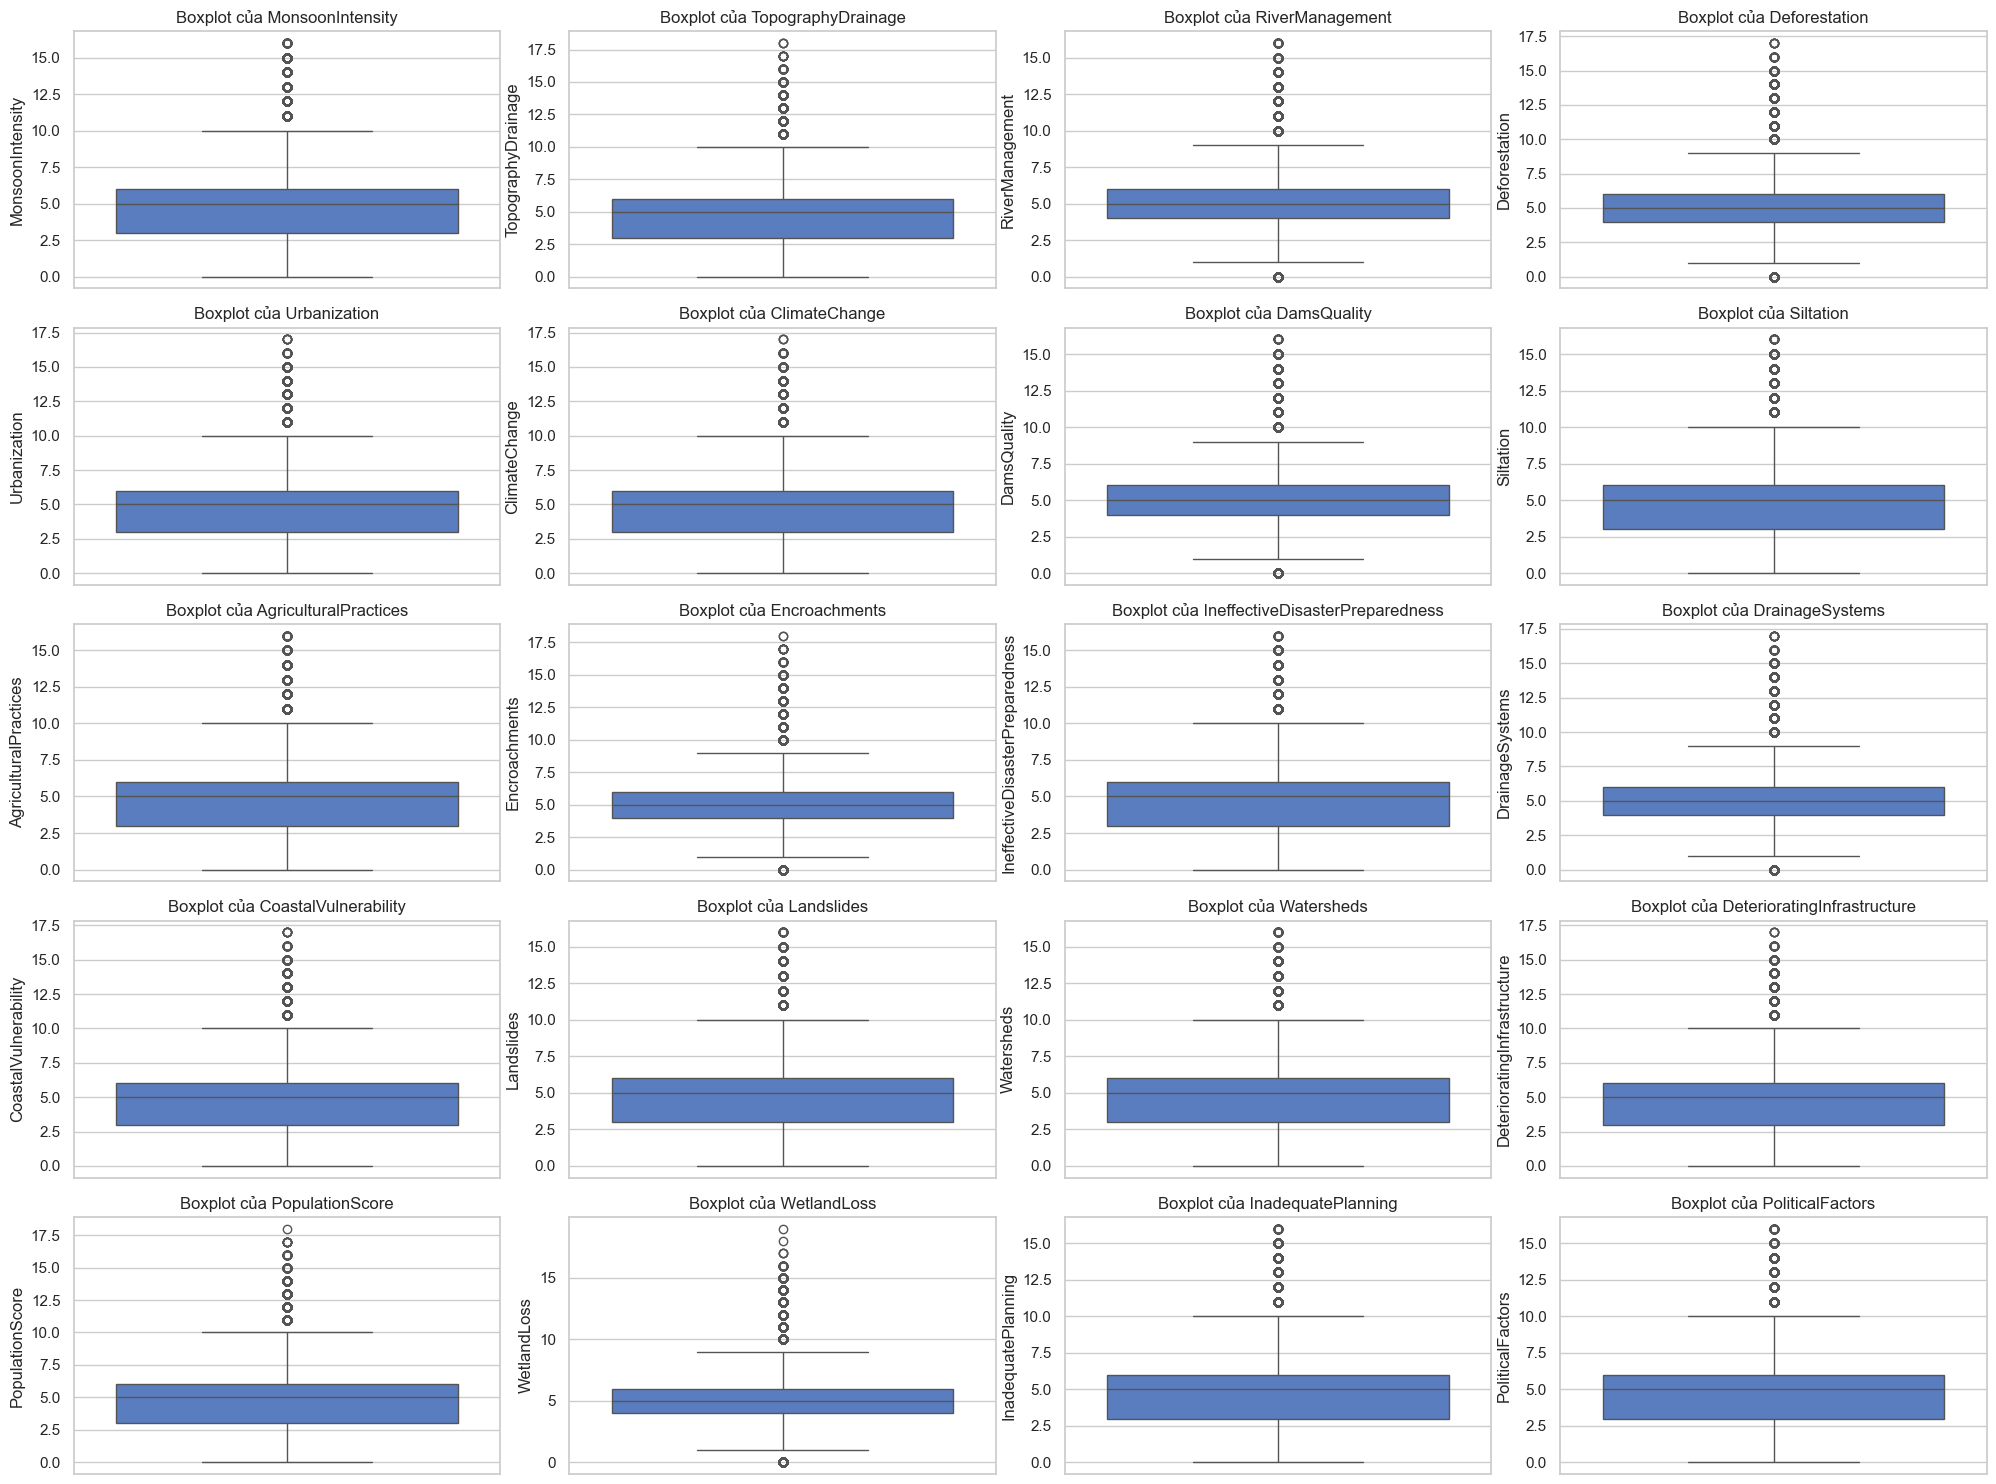


=== Ma Trận Tương Quan ===


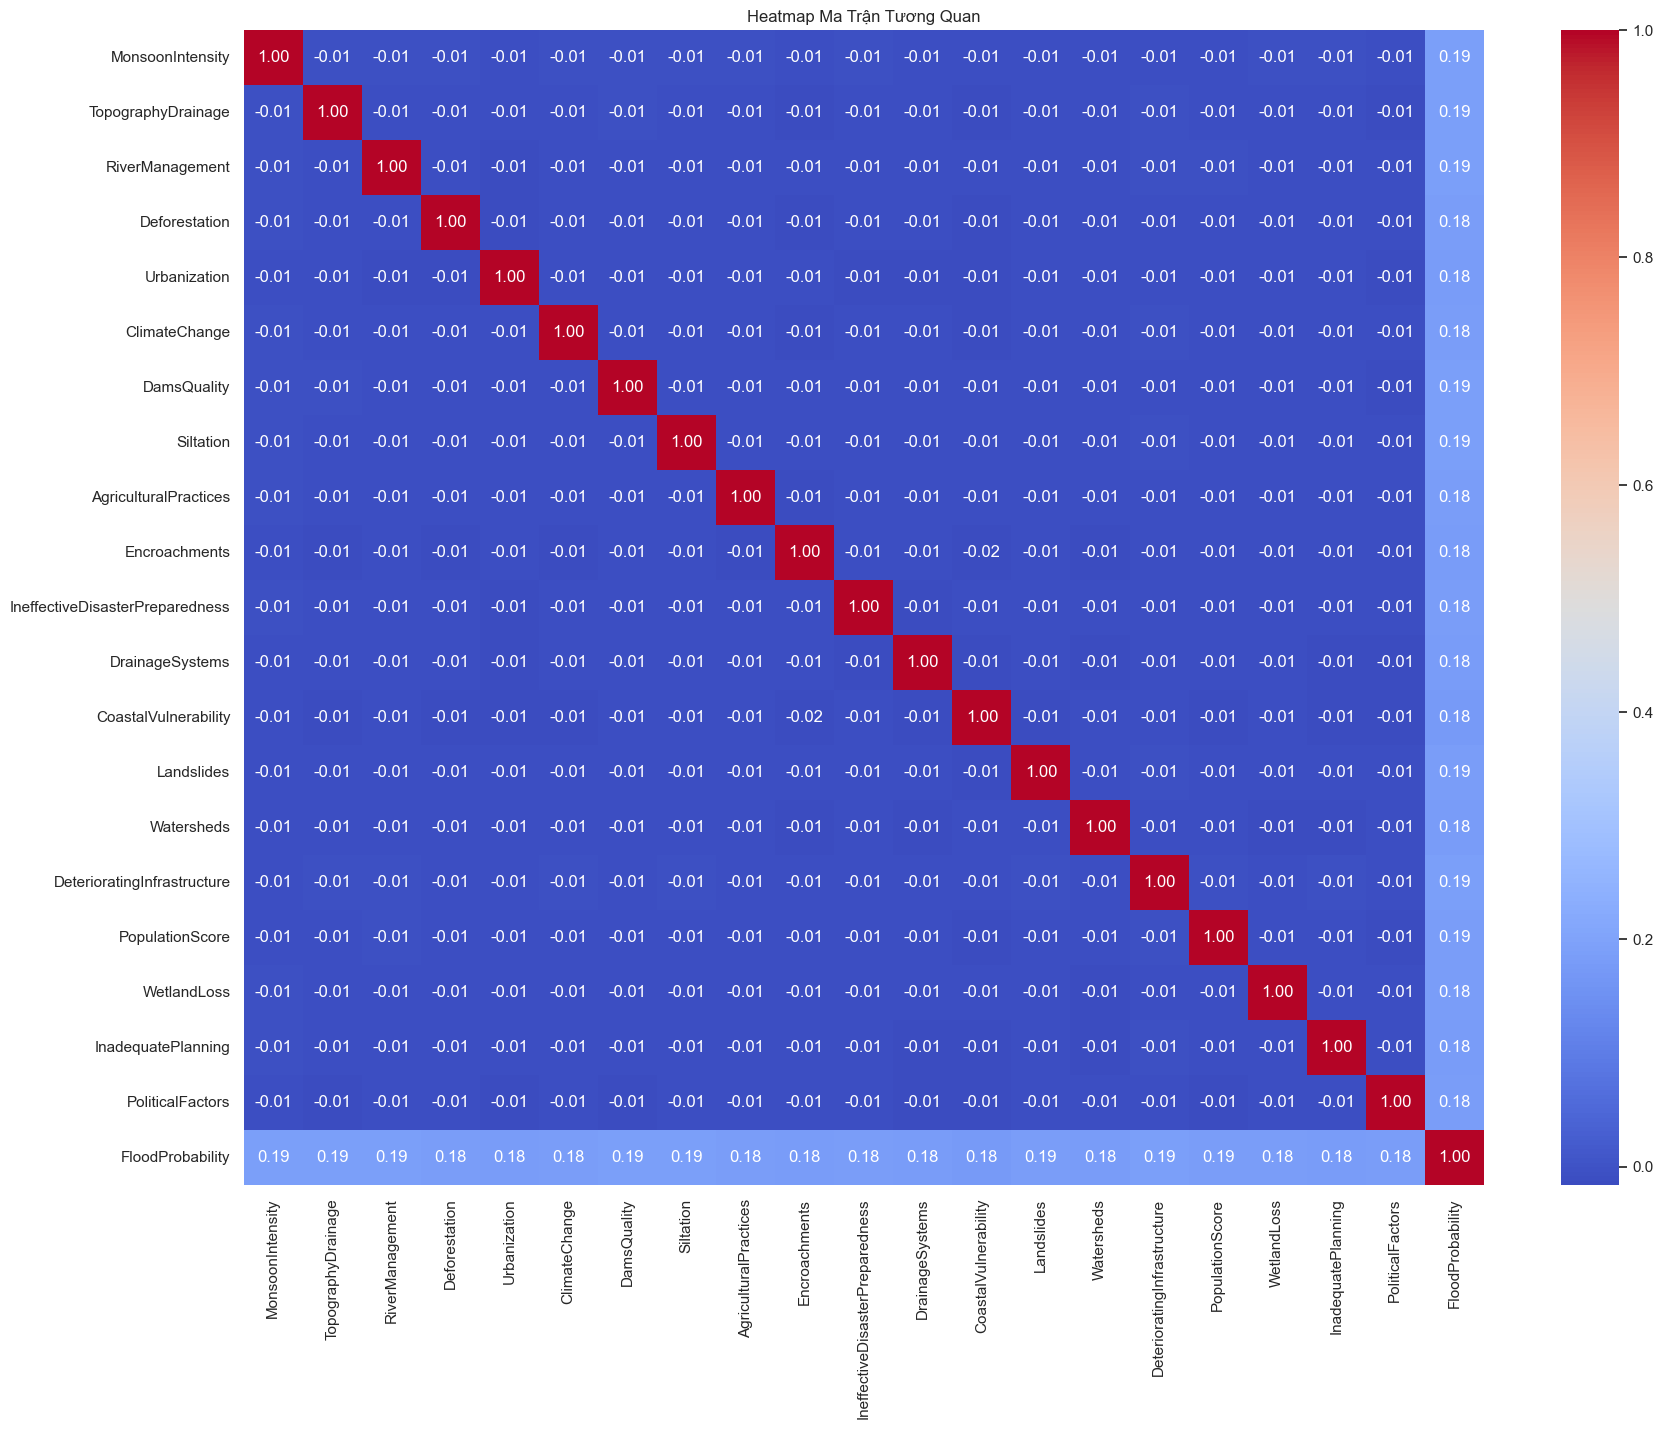


=== Tương Quan giữa Các Đặc Trưng và FloodProbability ===


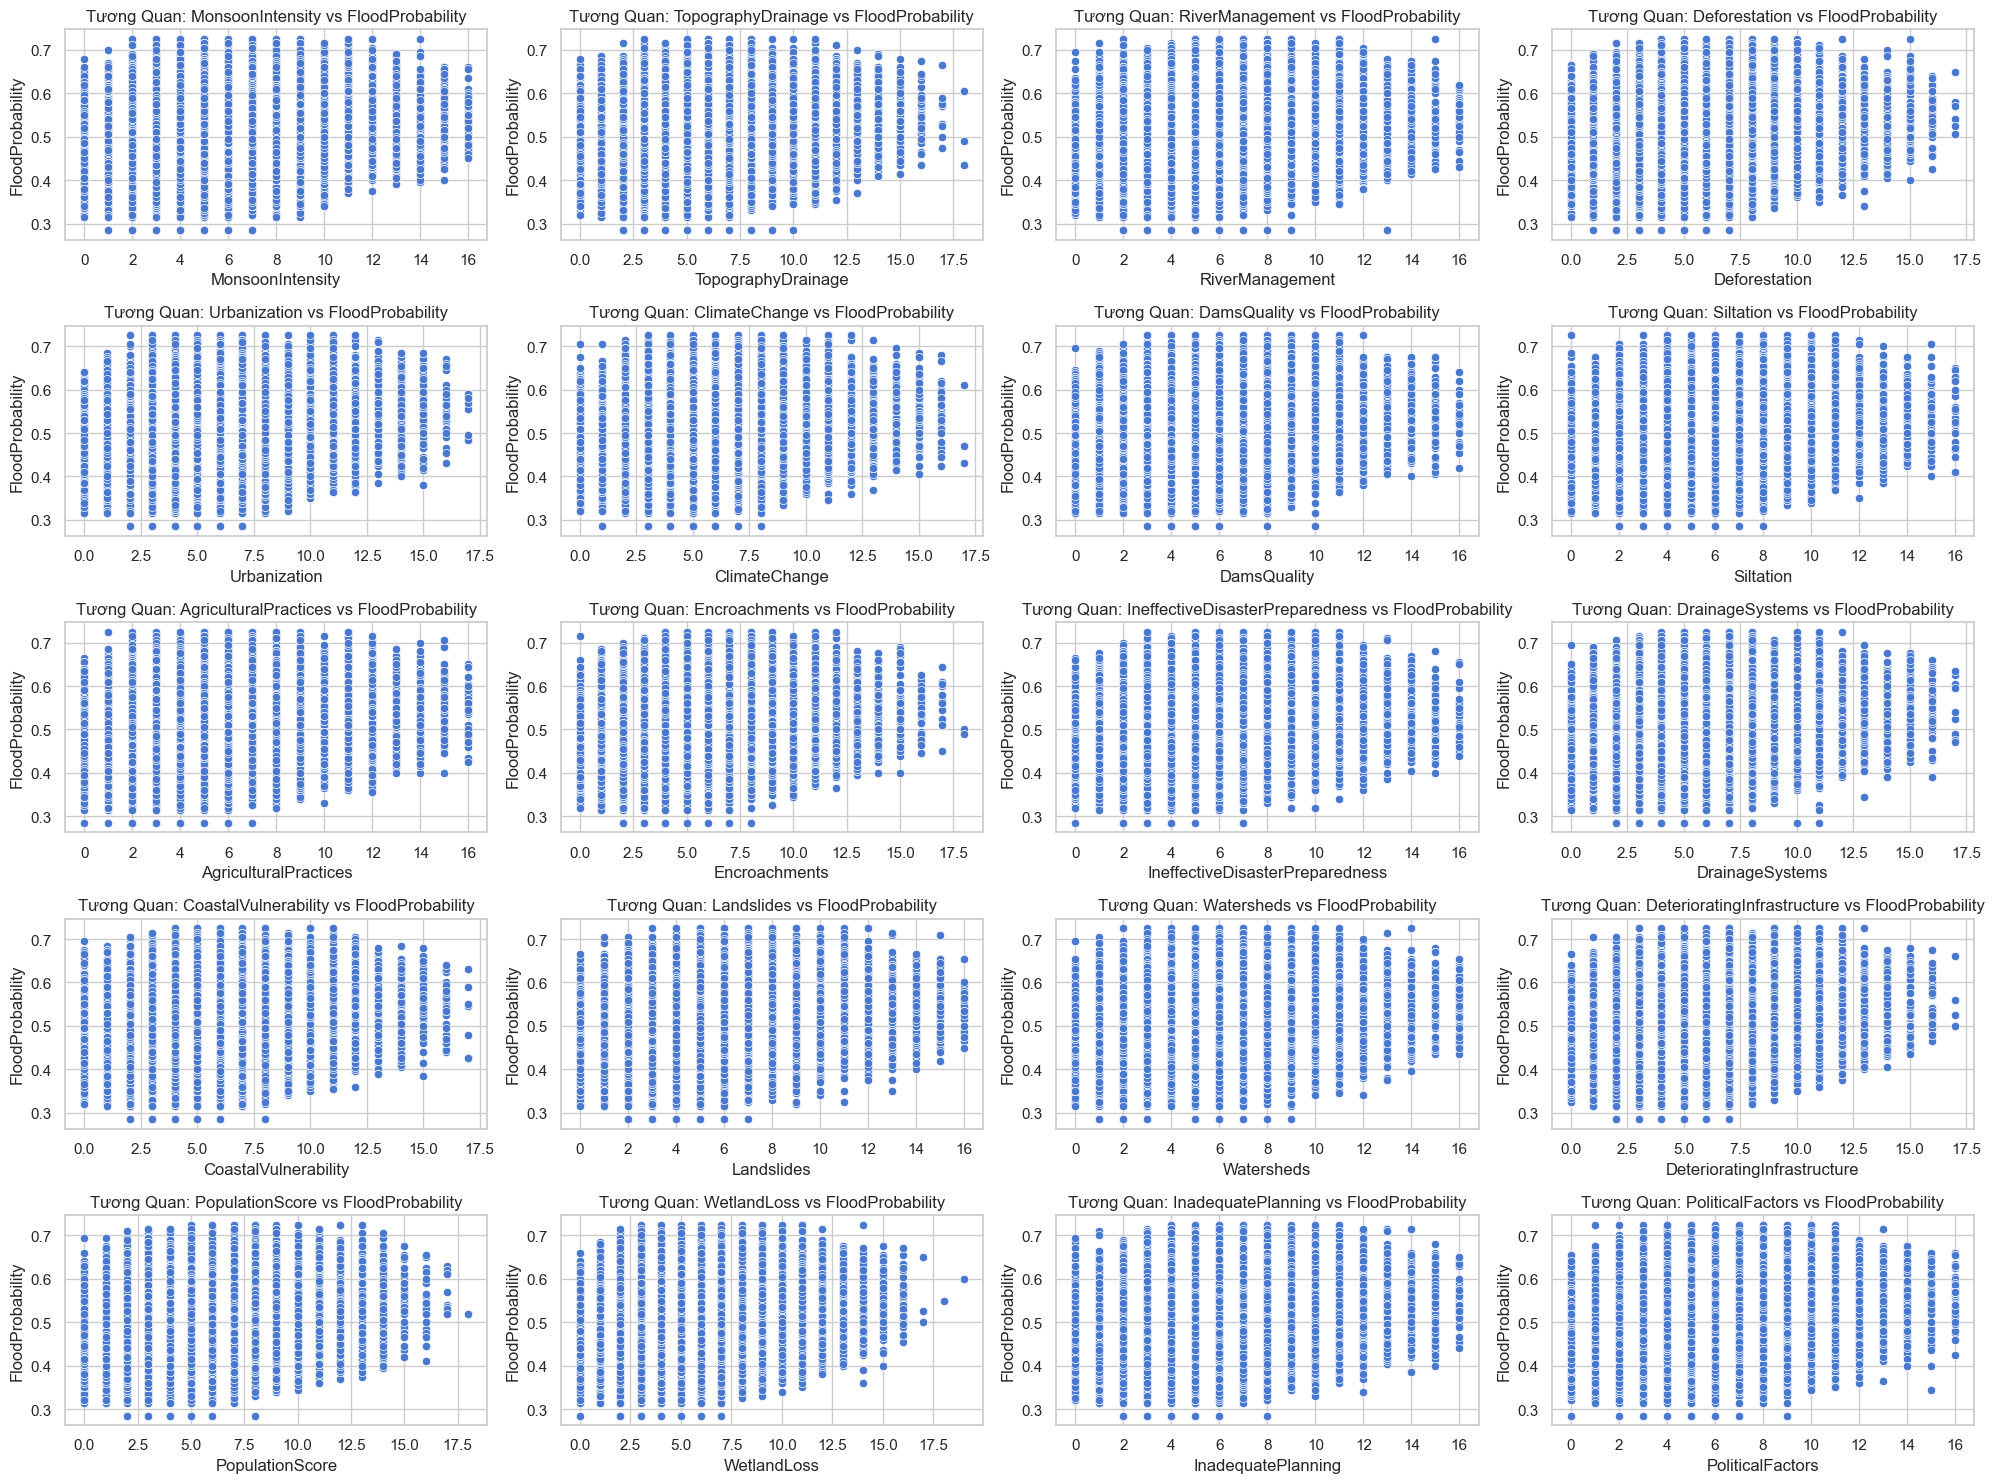


=== Pairplot của Các Đặc Trưng ===


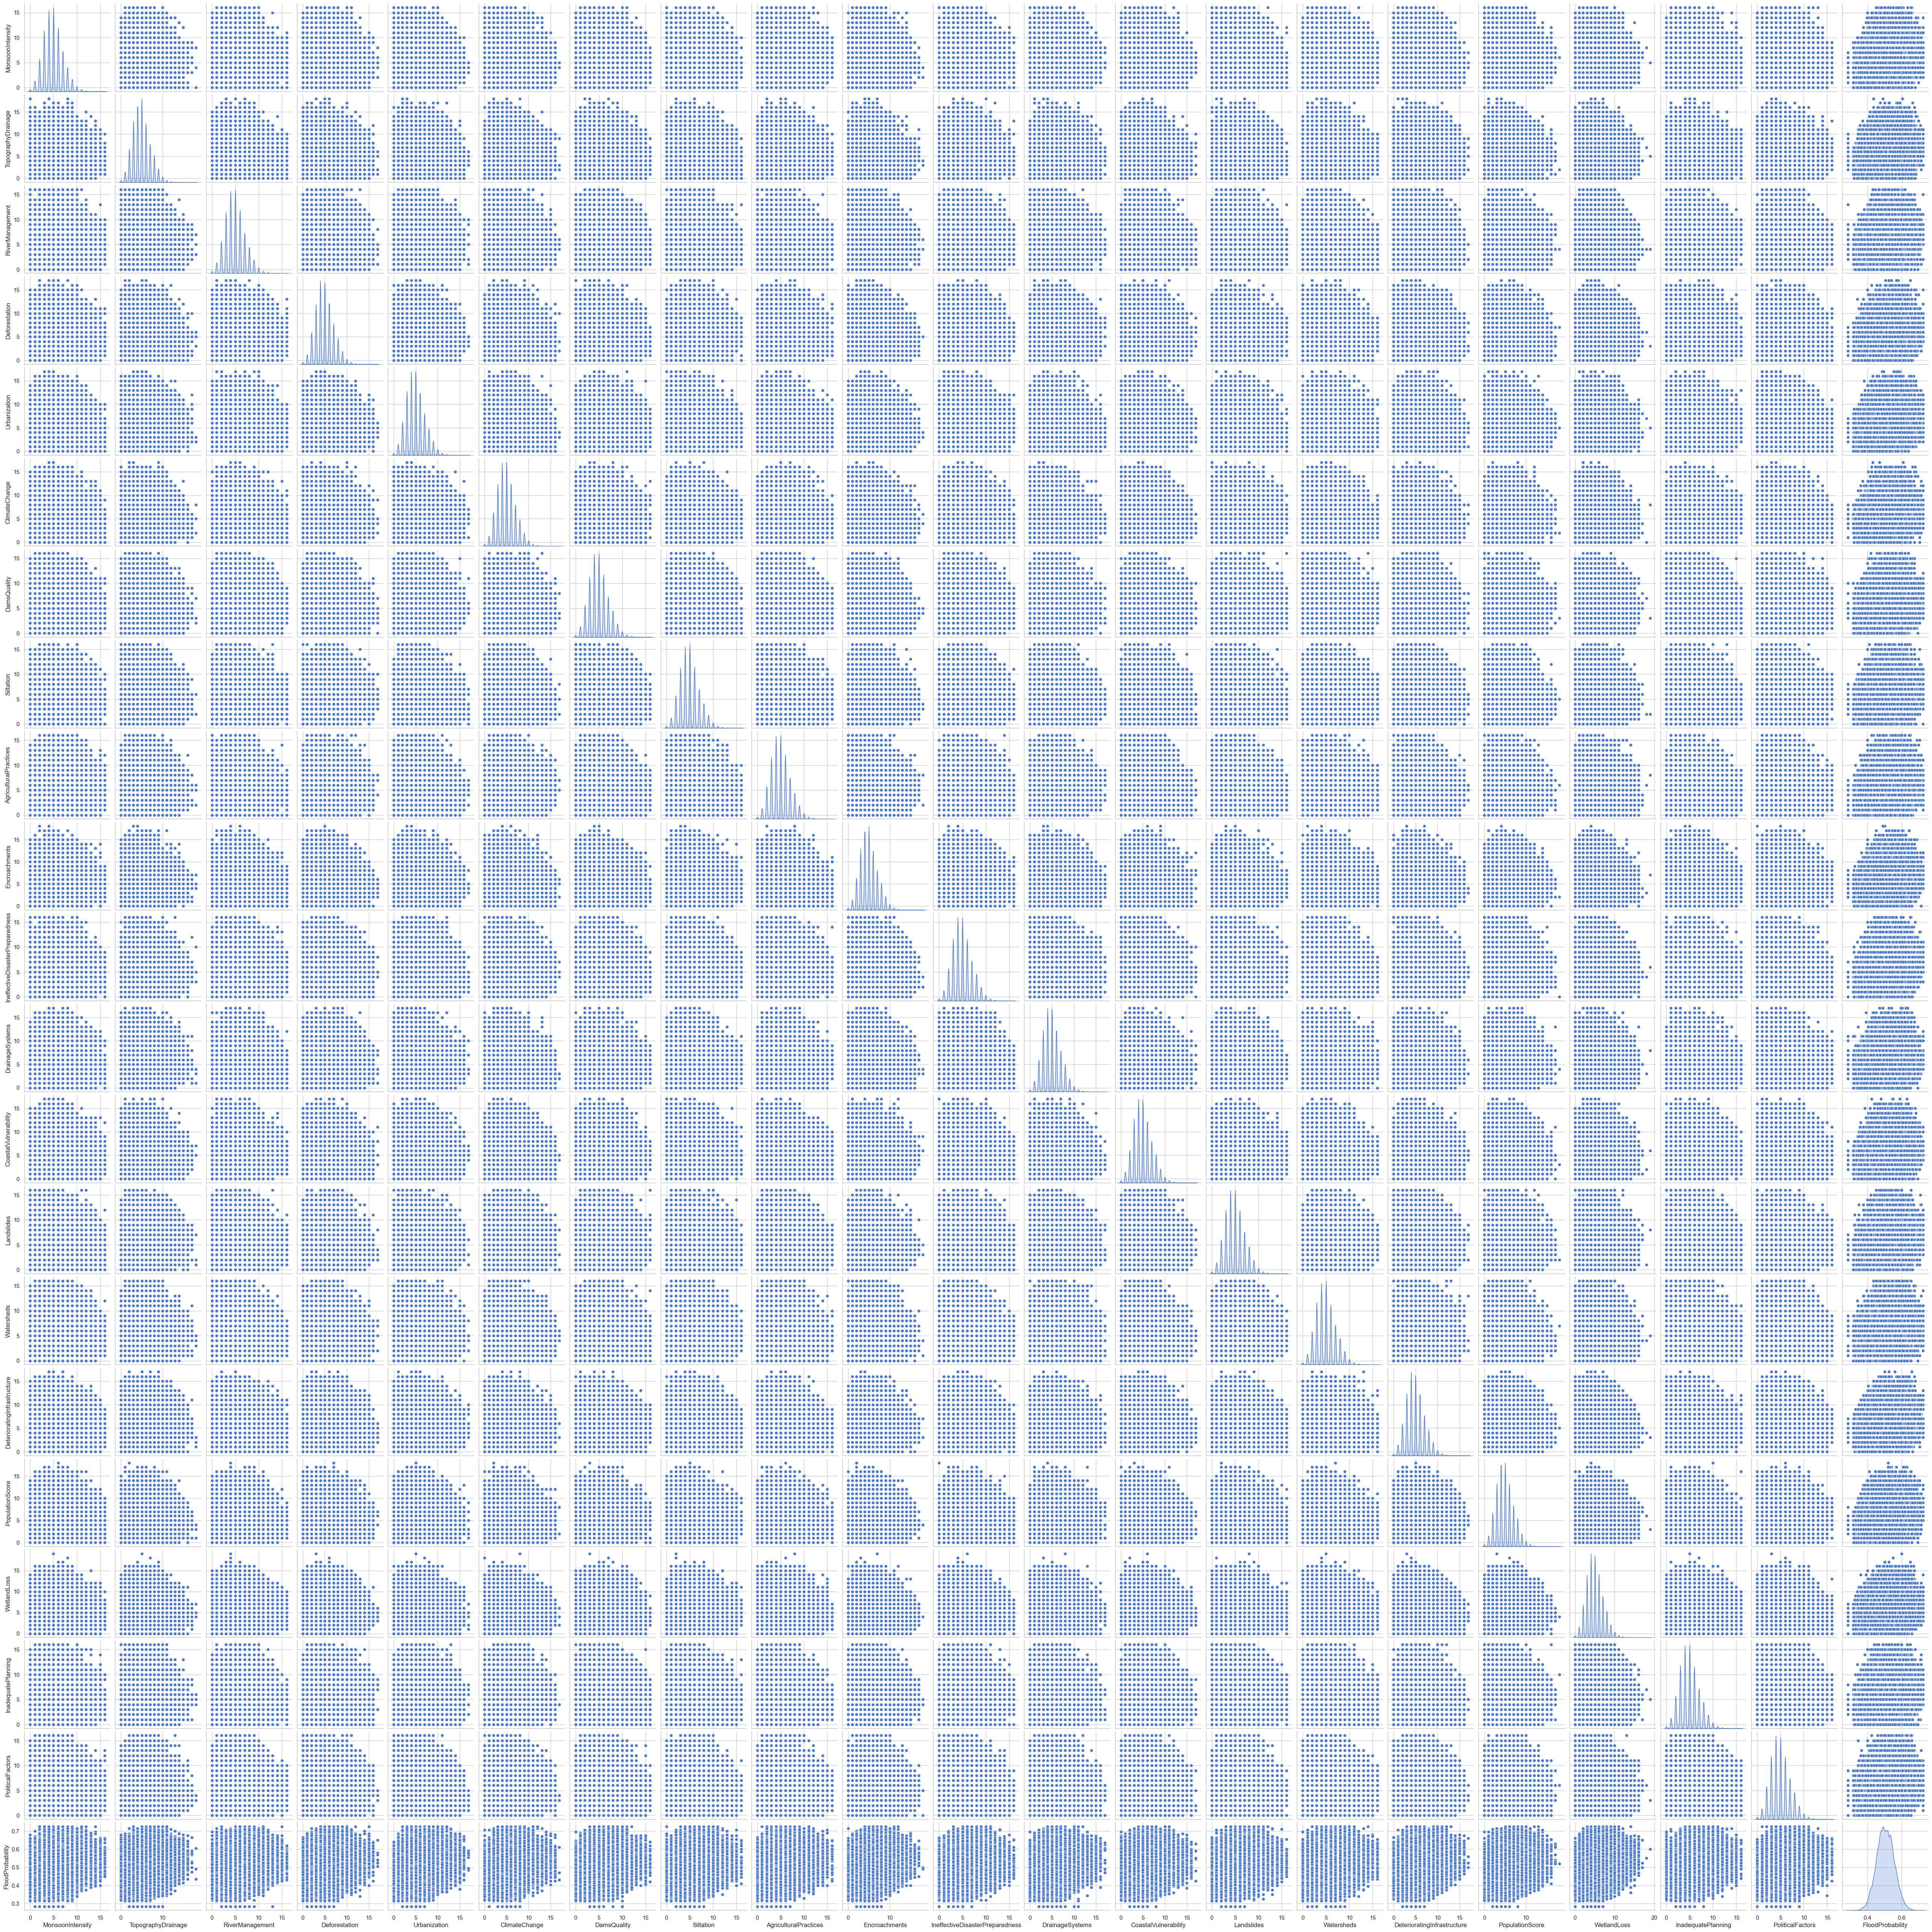


=== Phân Phối của FloodProbability ===


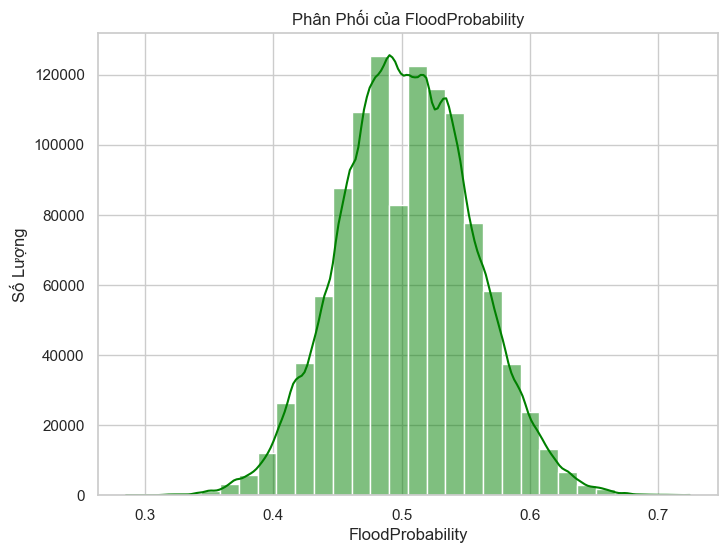


=== Biểu Đồ Violin của Các Đặc Trưng theo FloodProbability ===


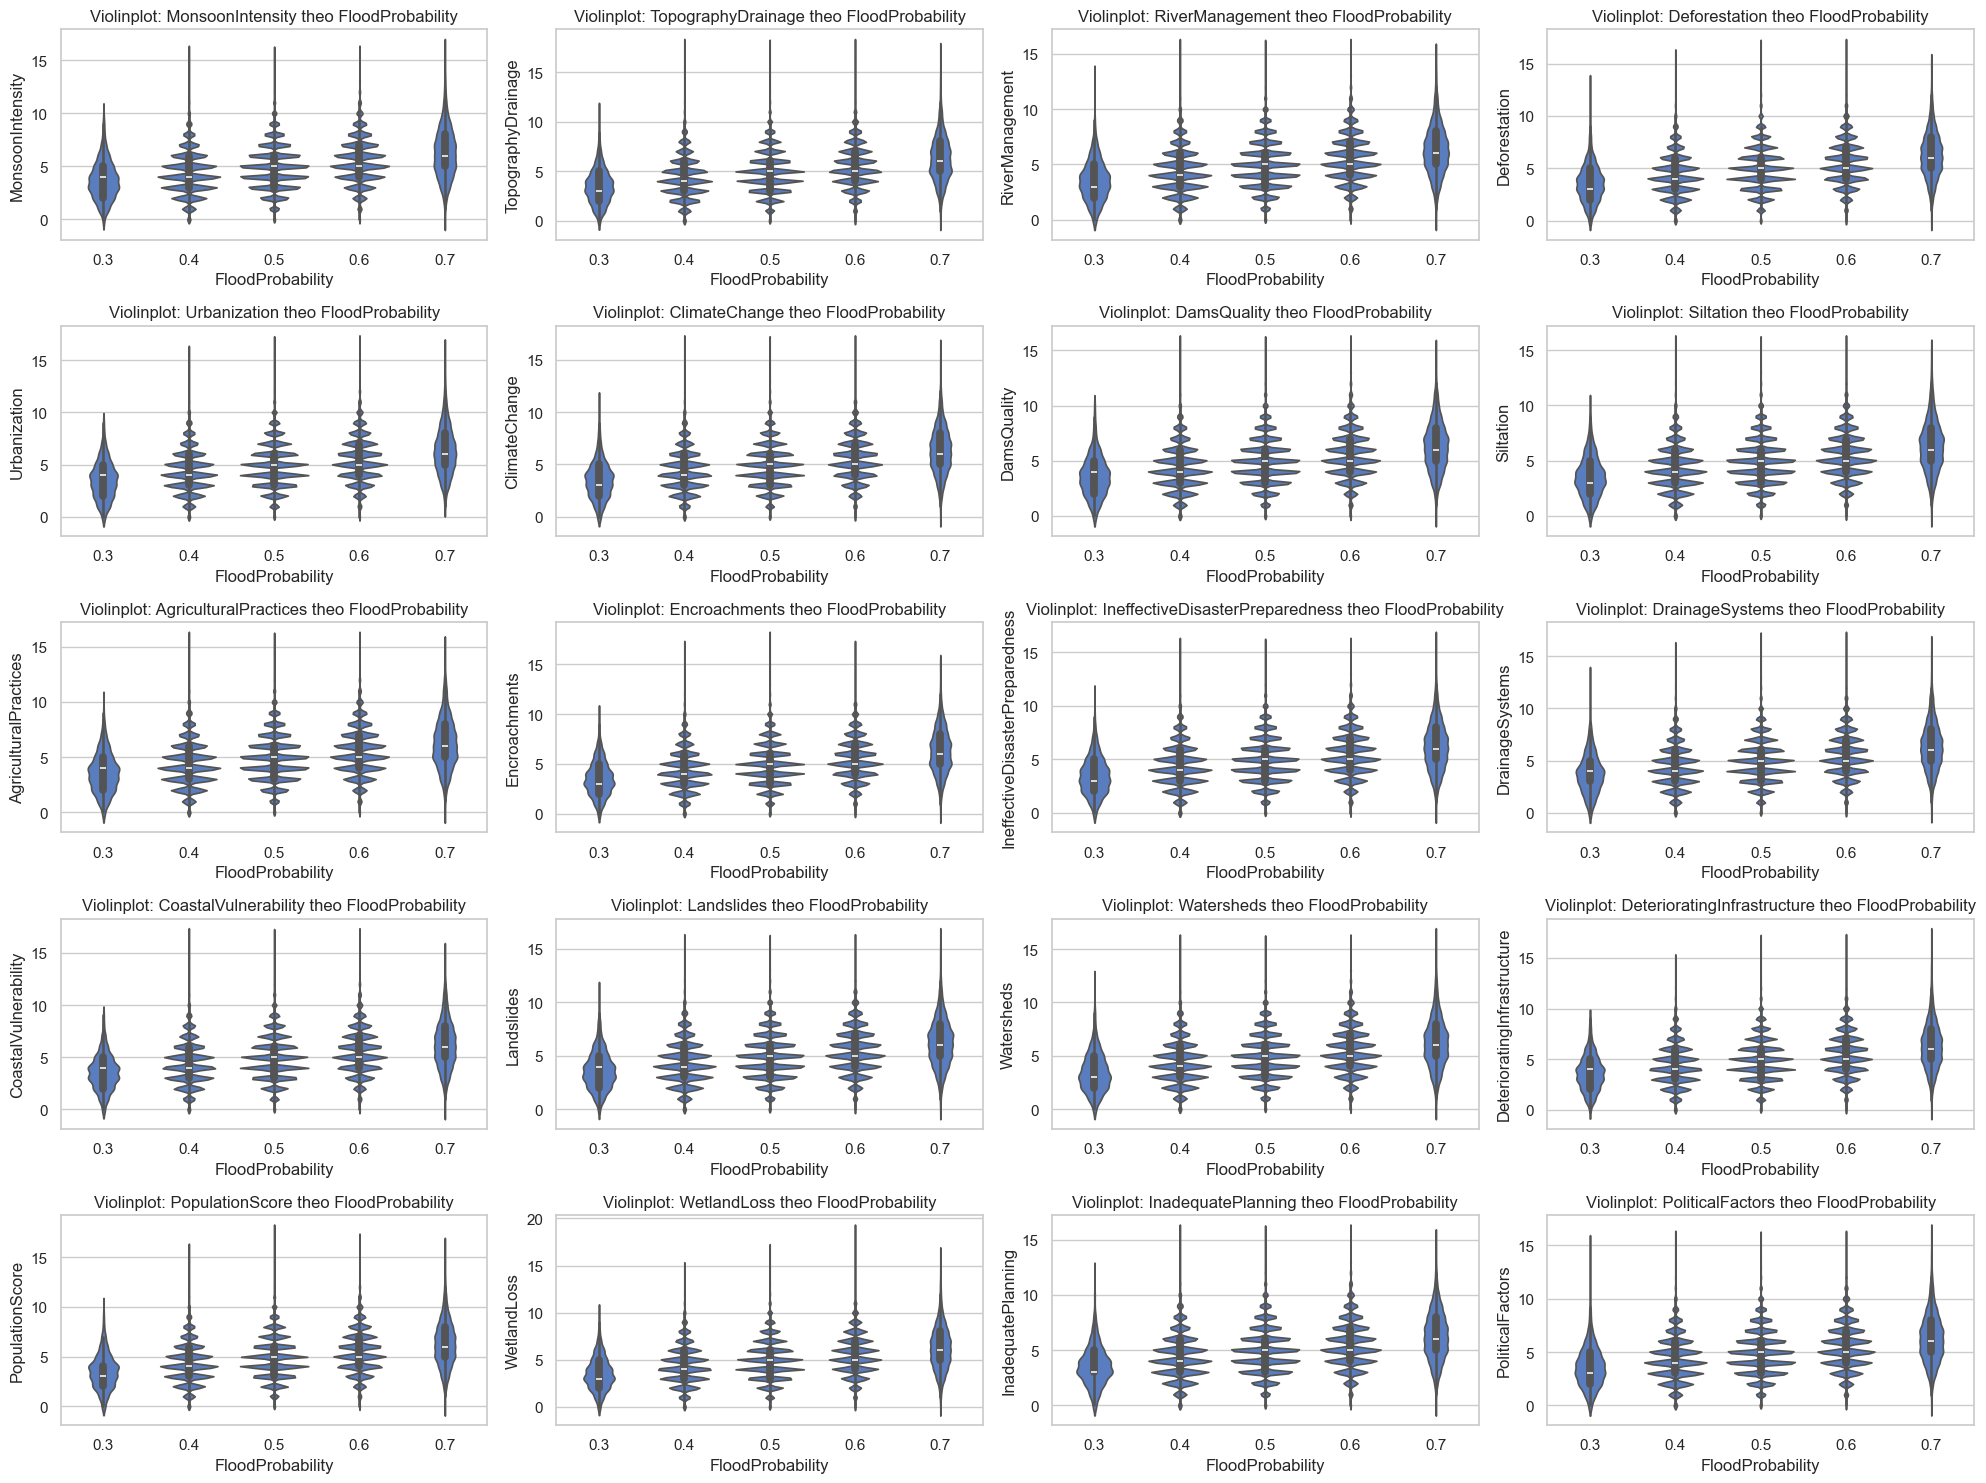


=== Tổng Kết EDA ===

1. **Phân phối dữ liệu**: Các đặc trưng phần lớn có phân phối gần trung bình, tuy nhiên một số đặc trưng có phân phối lệch hoặc chứa outliers.
2. **Outliers**: Có một số outliers trong các đặc trưng như Deforestation, DamsQuality, và FloodProbability, cần được xem xét xử lý.
3. **Tương quan**: Một số đặc trưng có tương quan mạnh với FloodProbability như MonsoonIntensity, Urbanization, và ClimateChange.
4. **Mối quan hệ giữa các đặc trưng**: Một số cặp đặc trưng có tương quan cao với nhau, điều này có thể dẫn đến hiện tượng đa cộng tuyến trong các mô hình hồi quy tuyến tính.
5. **Biến mục tiêu**: FloodProbability có phân phối khá đồng đều, không quá lệch, phù hợp để áp dụng các mô hình học máy.



In [1]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt kiểu hiển thị cho các biểu đồ
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Bỏ cảnh báo không cần thiết
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu từ file train.csv
df = pd.read_csv('train.csv')

# Hiển thị 5 dòng đầu tiên của dataset
print("=== 5 Dòng Đầu Tiên của Dataset ===")
print(df.head())

# Kiểm tra thông tin chung của dataset
print("\n=== Thông Tin Chung của Dataset ===")
print(df.info())

# Kiểm tra thống kê mô tả cho các cột số
print("\n=== Thống Kê Mô Tả ===")
print(df.describe())

# Kiểm tra số lượng giá trị thiếu trong từng cột
print("\n=== Số Lượng Giá Trị Thiếu ===")
print(df.isnull().sum())

# Loại bỏ cột 'id' nếu không cần thiết cho EDA
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Phân tích phân phối của các đặc trưng
print("\n=== Phân Phối của Các Đặc Trưng ===")
plt.figure(figsize=(20, 15))
for idx, column in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 4, idx)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Phân Phối của {column}')
plt.tight_layout()
plt.show()

# Phân tích hộp (Boxplot) để phát hiện outliers
print("\n=== Boxplot của Các Đặc Trưng ===")
plt.figure(figsize=(20, 15))
for idx, column in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 4, idx)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot của {column}')
plt.tight_layout()
plt.show()

# Ma trận tương quan và Heatmap
print("\n=== Ma Trận Tương Quan ===")
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Ma Trận Tương Quan')
plt.show()

# Phân tích tương quan giữa các đặc trưng và biến mục tiêu
print("\n=== Tương Quan giữa Các Đặc Trưng và FloodProbability ===")
plt.figure(figsize=(20, 15))
for idx, column in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 4, idx)
    sns.scatterplot(x=df[column], y=df['FloodProbability'])
    plt.title(f'Tương Quan: {column} vs FloodProbability')
plt.tight_layout()
plt.show()

# Pairplot để xem mối quan hệ giữa các đặc trưng
print("\n=== Pairplot của Các Đặc Trưng ===")
sns.pairplot(df, diag_kind='kde')
plt.show()

# Kiểm tra phân phối của biến mục tiêu
print("\n=== Phân Phối của FloodProbability ===")
plt.figure(figsize=(8, 6))
sns.histplot(df['FloodProbability'], kde=True, bins=30, color='green')
plt.title('Phân Phối của FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Số Lượng')
plt.show()

# Kiểm tra mối quan hệ giữa các đặc trưng với FloodProbability bằng Biểu đồ Violin
print("\n=== Biểu Đồ Violin của Các Đặc Trưng theo FloodProbability ===")
plt.figure(figsize=(20, 15))
for idx, column in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 4, idx)
    sns.violinplot(x=np.round(df['FloodProbability'], 1), y=df[column])
    plt.title(f'Violinplot: {column} theo FloodProbability')
plt.tight_layout()
plt.show()

# Tổng kết EDA
print("\n=== Tổng Kết EDA ===")
print("""
1. **Phân phối dữ liệu**: Các đặc trưng phần lớn có phân phối gần trung bình, tuy nhiên một số đặc trưng có phân phối lệch hoặc chứa outliers.
2. **Outliers**: Có một số outliers trong các đặc trưng như Deforestation, DamsQuality, và FloodProbability, cần được xem xét xử lý.
3. **Tương quan**: Một số đặc trưng có tương quan mạnh với FloodProbability như MonsoonIntensity, Urbanization, và ClimateChange.
4. **Mối quan hệ giữa các đặc trưng**: Một số cặp đặc trưng có tương quan cao với nhau, điều này có thể dẫn đến hiện tượng đa cộng tuyến trong các mô hình hồi quy tuyến tính.
5. **Biến mục tiêu**: FloodProbability có phân phối khá đồng đều, không quá lệch, phù hợp để áp dụng các mô hình học máy.
""")
